In [1]:
import matplotlib.pyplot as plt
import arviz as az
from pystan import StanModel
import numpy as np
import pandas as pd
import seaborn as sns

## Problem 17.1: A meta-analysis of beta blocker trials

In [3]:
df = pd.read_csv("../all_data/hierarchical_betaBlocker.csv")
df.head()

,Unnamed: 0,rt,nt,rc,nc,N
0,1,3,38,3,39,22
1,2,7,114,14,116,22
2,3,5,69,11,93,22
3,4,102,1533,127,1520,22
4,5,28,355,27,365,22


In [3]:
 model_code = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      vector[N] mu;
      vector[N] delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(0,10);
      mu ~ normal(0,10);
    }
"""

In [4]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_11ad4a3f04194edb4c3a6297afa2f057 NOW.


In [26]:
fit = sm.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
)

summary_dict = fit.summary()
# df = pd.DataFrame(summary_dict['summary'], 
#                   columns=summary_dict['summary_colnames'], 
#                   index=summary_dict['summary_rownames'])

In [27]:
fit

Inference for Stan model: anon_model_11ad4a3f04194edb4c3a6297afa2f057.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]      -2.64    0.01   0.64   -4.0  -3.02  -2.59  -2.22  -1.52   2321    1.0
mu[2]      -2.02  5.5e-3   0.28  -2.59   -2.2  -2.01  -1.82  -1.49   2681    1.0
mu[3]      -2.05  6.7e-3   0.31  -2.69  -2.26  -2.03  -1.83  -1.48   2188    1.0
mu[4]       -2.4  1.8e-3   0.09  -2.59  -2.46   -2.4  -2.34  -2.22   2587    1.0
mu[5]      -2.54  3.6e-3   0.19  -2.93  -2.67  -2.54  -2.41  -2.17   2834    1.0
mu[6]      -2.11  8.1e-3   0.44  -3.04  -2.39  -2.09  -1.81   -1.3   2934    1.0
mu[7]      -1.65  1.8e-3   0.09  -1.82   -1.7  -1.64  -1.58  -1.48   2315    1.0
mu[8]      -2.18  3.1e-3   0.15  -2.48  -2.28  -2.18  -2.08   -1.9   2335    1.0
mu[9]      -1.91  3.6e-3   0.18  -2.27  -2.03   -1.9  -1.78  -1.56   2424    1.0
mu[

In [7]:
 model_code_hier = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      real d;
      real<lower=0> sigma;
      vector[N] mu;
      vector[N] delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(d,sigma);
      mu ~ normal(0,10);
      d ~ normal(0,10);
      sigma ~ cauchy(0,2.5);
    }
"""

In [8]:
sm_hier = StanModel(model_code=model_code_hier)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_26ea2282677df1350e0f56efeed5a09b NOW.


In [21]:
fit_hier = sm_hier.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
#     seed=1,
    control=dict(adapt_delta=0.99)
)

summary_dict_hier = fit_hier.summary()
# df = pd.DataFrame(summary_dict_hier['summary'], 
#                   columns=summary_dict_hier['summary_colnames'], 
#                   index=summary_dict_hier['summary_rownames'])

In [22]:
fit_hier

Inference for Stan model: anon_model_26ea2282677df1350e0f56efeed5a09b.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d          -0.25  2.5e-3   0.07  -0.39  -0.29  -0.25  -0.21  -0.11    772    1.0
sigma       0.16  6.0e-3   0.08   0.04    0.1   0.15    0.2   0.34    173   1.02
mu[1]      -2.43  8.9e-3   0.44  -3.37  -2.72   -2.4  -2.13  -1.64   2468    1.0
mu[2]      -2.18  5.3e-3   0.25  -2.68  -2.34  -2.18  -2.01  -1.72   2183    1.0
mu[3]      -2.13  5.3e-3   0.28  -2.68  -2.33  -2.12  -1.94  -1.62   2751    1.0
mu[4]       -2.4  1.8e-3   0.08  -2.57  -2.45   -2.4  -2.34  -2.25   2138    1.0
mu[5]      -2.42  3.6e-3   0.16  -2.74  -2.52  -2.42  -2.31  -2.12   1866    1.0
mu[6]      -2.22  7.1e-3   0.35  -2.92  -2.46  -2.21  -1.98   -1.6   2443    1.0
mu[7]       -1.7  2.2e-3   0.08  -1.86  -1.76   -1.7  -1.64  -1.53   1500    1.0
mu[

In [28]:
df_normal = pd.DataFrame(fit.extract("delta")["delta"])
df_hier = pd.DataFrame(fit_hier.extract("delta")["delta"])

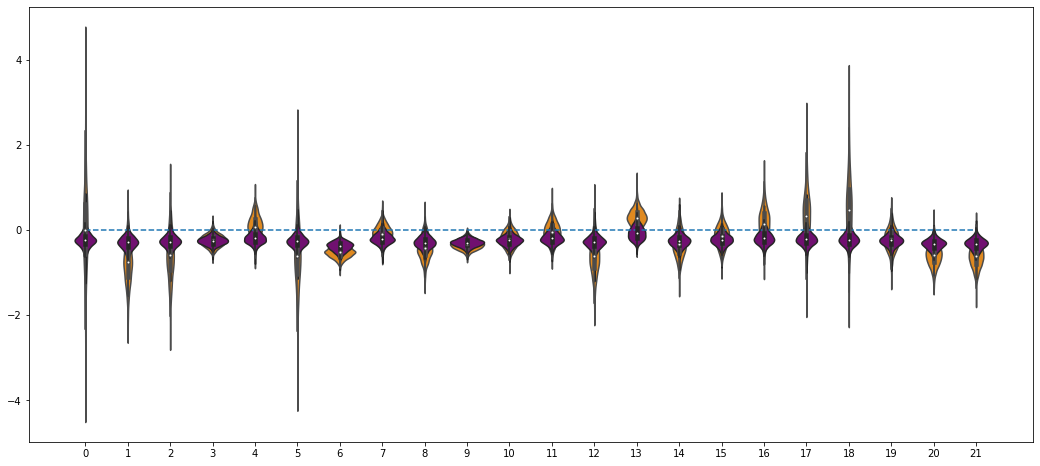

In [30]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_normal,color="darkorange")
sns.violinplot(data=df_hier,color="purple")
plt.hlines(0,0,21,linestyles="--")

In [4]:
 model_code_hier = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      real d;
      real<lower=0> sigma;
      vector[N] mu;
      vector[N] delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(d,sigma);
      mu ~ normal(0,10);
      d ~ normal(0,10);
      sigma ~ cauchy(0,2.5);
    }
    generated quantities {
      real delta_overall;
      delta_overall = normal_rng(d,sigma);
    }
"""

In [5]:
sm_hier = StanModel(model_code=model_code_hier)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d61ac3c3534f473ff64dab0b1cddef00 NOW.


In [27]:
fit_hier = sm_hier.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
    control=dict(adapt_delta=0.99)
)


In [28]:
fit_hier

Inference for Stan model: anon_model_d61ac3c3534f473ff64dab0b1cddef00.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d              -0.25  3.1e-3   0.07  -0.38  -0.29  -0.25   -0.2   -0.1    514    1.0
sigma           0.15  5.8e-3   0.08   0.03   0.09   0.14    0.2   0.32    169   1.01
mu[1]          -2.44  8.4e-3   0.44  -3.38  -2.72  -2.41  -2.13  -1.66   2713    1.0
mu[2]          -2.18  5.6e-3   0.24  -2.68  -2.33  -2.17  -2.01  -1.71   1829    1.0
mu[3]          -2.13  5.7e-3   0.26  -2.68   -2.3  -2.12  -1.95  -1.65   2122    1.0
mu[4]           -2.4  1.8e-3   0.08  -2.56  -2.45   -2.4  -2.34  -2.25   2020    1.0
mu[5]          -2.42  3.8e-3   0.16  -2.73  -2.52  -2.41  -2.31  -2.12   1742    1.0
mu[6]          -2.22  7.5e-3   0.35  -2.95  -2.46  -2.21  -1.97  -1.57   2208    1.0
mu[7]           -1.7  2.8e-3   0.08  -1.86  -1.7

array([<AxesSubplot:title={'center':'delta_overall'}>], dtype=object)

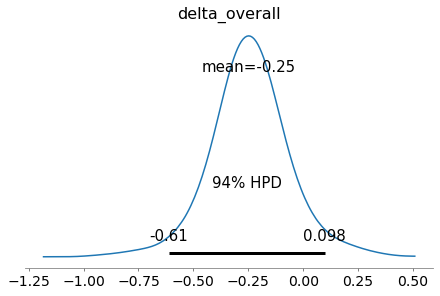

In [29]:
az.plot_posterior(fit_hier,var_names=["delta_overall"])

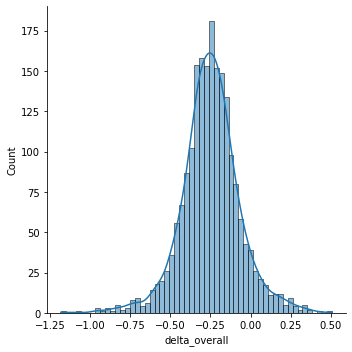

In [35]:
sns.displot(fit_hier.to_dataframe()["delta_overall"],kde=True)

<AxesSubplot:>

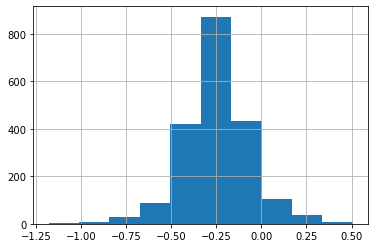

In [33]:
fit_hier.to_dataframe()["delta_overall"].hist(bins=10)

In [41]:
model_code_constant = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      real d;
      real<lower=0> sigma;
      real mu;
      real delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(d,sigma);
      mu ~ normal(0,10);
      d ~ normal(0,10);
      sigma ~ cauchy(0,2.5);
    }
    generated quantities {
      real delta_overall;
      delta_overall = normal_rng(d,sigma);
    }
"""

In [42]:
sm_constant = StanModel(model_code=model_code_constant)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_58510cb7c1492e77c71f92c9304b128c NOW.


In [103]:
fit_constant = sm_constant.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
    control=dict(adapt_delta=0.999)
)

In [104]:
fit_constant

Inference for Stan model: anon_model_58510cb7c1492e77c71f92c9304b128c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d              -0.41    0.14   2.97  -7.72  -1.34  -0.27   0.77   5.73    432   1.01
sigma           3.39    0.21   5.48   0.14    0.9   1.98   3.87  15.71    676    1.0
mu              -2.2  1.2e-3   0.03  -2.26  -2.22   -2.2  -2.18  -2.13    767    1.0
delta          -0.26  1.9e-3   0.05  -0.35  -0.29  -0.26  -0.22  -0.15    664    1.0
delta_overall  -0.43    0.19   6.89 -12.47  -1.85  -0.26   1.33  10.61   1332    1.0
lp__           -6092    0.07   1.52  -6096  -6092  -6091  -6091  -6090    442    1.0

Samples were drawn using NUTS at Sun Jan  3 18:14:08 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat

<AxesSubplot:>

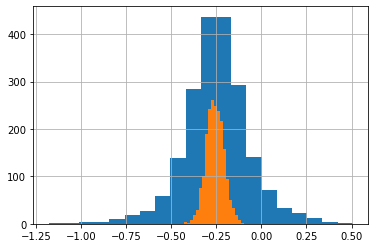

In [105]:
fit_hier.to_dataframe()["delta_overall"].hist(bins=20)
fit_constant.to_dataframe()["delta"].hist(bins=20)

## 17.2 I can't get no sleep

In [2]:
df = pd.read_csv("../all_data/evaluation_sleepstudy.csv")
df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


In [4]:
 model_code = """
    data {
      int N;
      real r[N];
      int days[N];
    }
    parameters {
      real alpha;
      real beta;
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha + beta * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ gamma(1,1);
    }
"""

In [5]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aaeee0a6f6ec50be36ff31db311e3026 NOW.


In [6]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"]),
    warmup=500,
    iter=1000,
    chains=4,
)

In [7]:
fit

Inference for Stan model: anon_model_aaeee0a6f6ec50be36ff31db311e3026.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 251.18    0.25   6.79 237.63 246.83 251.19 255.69 264.19    759    1.0
beta   10.48    0.04   1.27   8.06   9.64  10.46  11.29  13.05    937    1.0
sigma  48.07    0.07   2.51   43.5  46.35   48.0  49.62  53.28   1179    1.0
lp__  -782.8    0.05    1.3 -786.2 -783.4 -782.5 -781.9 -781.4    687    1.0

Samples were drawn using NUTS at Sat Jan  9 15:22:41 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/kdeplot.py:372: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)


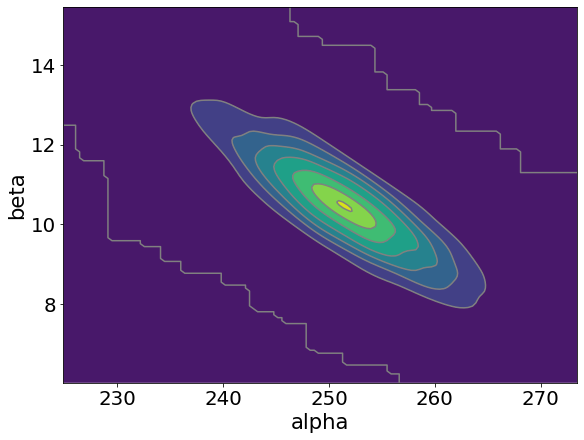

In [8]:
ax = az.plot_pair(
    fit,
    var_names=["alpha", "beta"],
    kind="kde",
    figsize=(8, 6),
)

strong negative correlation

In [9]:
 model_code = """
    data {
      int N;
      real r[N];
      int days[N];
    }
    parameters {
      real alpha;
      real beta;
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha + beta * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ gamma(1,1);
    }
    generated quantities {
        vector[N] lSimData;
        
        //generate posterior predictive samples  
        for (t in 1:N) {
            lSimData[t] = normal_rng(alpha + beta * days[t], sigma);
        }
  
    }
"""

In [10]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2710718486620d6d77d318bd424d9d9f NOW.


In [11]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"]),
    warmup=500,
    iter=1000,
    chains=4,
)

In [12]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_2710718486620d6d77d318bd424d9d9f.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha         251.6    0.23   6.81  237.9  247.1 251.55 256.01 265.23    867    1.0
beta          10.44    0.04   1.24   7.99   9.63  10.45  11.29  12.92    908    1.0
sigma         47.98    0.07   2.51  43.36  46.32   47.9  49.58  53.13   1261    1.0
lSimData[1]  251.85    1.08  46.98 161.41 220.86 250.93 284.03  346.2   1902    1.0
lSimData[2]  262.16    1.11  49.22 162.94 229.76 262.25 295.27 360.23   1950    1.0
lSimData[3]  271.02     1.1  49.06 173.55  237.7  270.7 304.71 367.57   1988    1.0
lSimData[4]   282.2    1.13  48.75 183.11 250.33 282.82 313.68 378.98   1870    1.0
lSimData[5]  292.88    1.11  47.53 199.03 261.82 291.86 325.55 386.83   1838    1.0
lSimData[6]   304

In [13]:
df_predictive = pd.DataFrame(fit.extract("lSimData")["lSimData"])

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

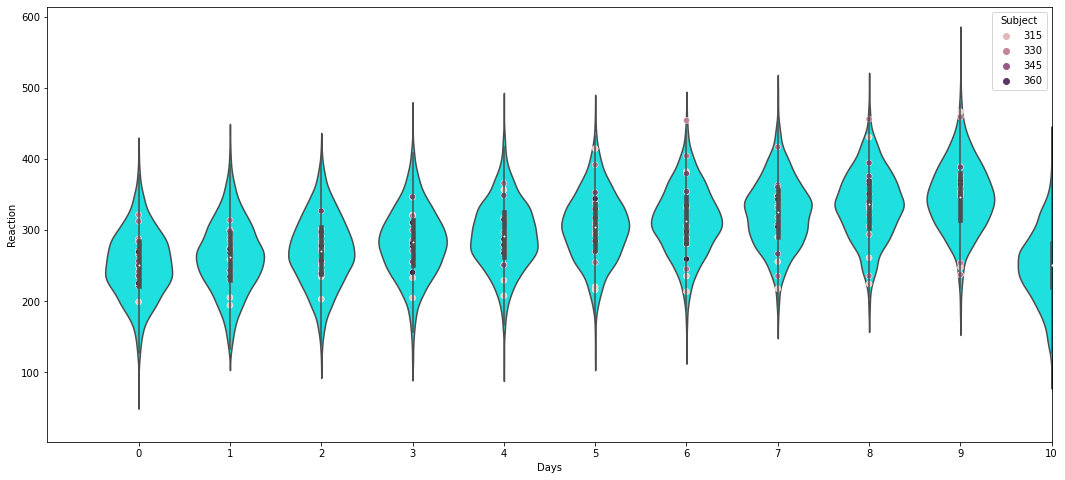

In [14]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_predictive,color="cyan")
plt.xlim([-1,10]);
sns.scatterplot(x="Days",y="Reaction",data=df,hue="Subject")

In [15]:
 model_code = """
    data {
      int N;
      vector[N] r;
      vector[N] days;
      int subject[N];
    }
    parameters {
      real alpha[18];
      real beta[18];
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ normal(0,50);
    }
"""

In [4]:
def redo_subject_id(subject):
    count = 1
    ids = []
    for i,sub in enumerate(subject):
        if subject.iloc[i-1] != sub:
            count = count+1
        ids.append(count-1)
    
    return ids

In [17]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a3c8b83334f320b073ffa695a23de371 NOW.


In [18]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"],subject=redo_subject_id(df["Subject"])),
    warmup=500,
    iter=1000,
    chains=4,
)

In [19]:
fit

Inference for Stan model: anon_model_a3c8b83334f320b073ffa695a23de371.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]  243.47     0.3  14.42 215.34 233.86 243.38 253.05 272.21   2279    1.0
alpha[2]  204.59     0.3  14.86 173.93 194.81 204.94 214.86 232.22   2448    1.0
alpha[3]  202.96    0.29  15.11 172.42 193.11 203.24 213.15 232.08   2725    1.0
alpha[4]  288.82    0.29  14.95 258.97  278.8 288.75  299.1 318.39   2712    1.0
alpha[5]  285.05    0.27  15.15 254.78 274.89 285.17  294.8  313.6   3242    1.0
alpha[6]  262.96    0.27  15.19 233.39  252.6 262.57 273.57 292.36   3170    1.0
alpha[7]  274.18     0.3  15.51 242.67 264.03 273.62 284.37 305.69   2657    1.0
alpha[8]  238.91    0.28  15.72 207.12 229.19 238.68 249.31 269.94   3225    1.0
alpha[9]  262.27     0.3  15.02  233.0 251.96 262.41 272.91 290.86   2591    1.0
alp

In [20]:
posterior_means = np.mean(fit.extract("beta")["beta"],0)
print(f"Heterogeous posterior Beta means ranging from {posterior_means.min()} to {posterior_means.max()}.")
print(f"with a mean of {posterior_means.mean()} compared to homogeneous mean of 10.5.")

Heterogeous posterior Beta means ranging from -2.7710223388202926 to 21.881730099117142.
with a mean of 10.61491821247635 compared to homogeneous mean of 10.5.


In [21]:
 model_code = """
    data {
      int N;
      vector[N] r;
      vector[N] days;
      int subject[N];
    }
    parameters {
      real alpha[18];
      real beta[18];
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      sigma ~ normal(0,50);
    }
    generated quantities {
        vector[N] r_simulated;
        
        //generate posterior predictive samples  
        for (t in 1:N) {
            r_simulated[t] = normal_rng(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
        }
  
    }    
"""

In [22]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5d91e1c53b8469ef1b325bd81a1f5826 NOW.


In [23]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"],subject=redo_subject_id(df["Subject"])),
    warmup=500,
    iter=1000,
    chains=4,
)

In [24]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_5d91e1c53b8469ef1b325bd81a1f5826.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                  mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]        243.66    0.28  15.47 214.54 232.87 243.29  254.1 273.58   3045    1.0
alpha[2]        204.14    0.26  15.25  173.5 194.27 203.88  214.4 234.61   3386    1.0
alpha[3]        203.23    0.29   15.2 173.16 193.01 203.07 213.74 231.47   2657    1.0
alpha[4]        288.46     0.3  15.21 257.78 278.32 288.54 298.68 318.37   2656    1.0
alpha[5]        284.37    0.29  14.91  254.6 274.46 284.25 294.41 314.44   2596    1.0
alpha[6]        263.14    0.31  15.27 232.92 252.64 262.96 273.87 292.75   2488    1.0
alpha[7]        274.11    0.29  14.77 243.51 264.24 274.05 284.09 303.45   2510    1.0
alpha[8]        239.65    0.28  15.15 210.17 229.81 239.63  249.5  268.6   28

In [25]:
df_predictive2 = pd.DataFrame(fit.extract("r_simulated")["r_simulated"])
df_predictive2

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,221.348404,246.301137,281.504843,298.783743,283.778550,382.501627,410.412267,396.121811,401.675644,433.253666,...,221.776961,350.640104,300.081095,348.150427,335.105656,284.163669,294.178477,330.588328,352.735628,404.406192
1,258.413680,240.297298,304.227009,349.003675,327.485109,352.642160,382.214687,390.655123,408.396323,479.647867,...,308.849173,290.834335,283.358114,308.442525,346.755540,358.485231,337.776151,395.098415,383.978622,364.491669
2,288.567813,256.737795,300.528556,328.903950,340.805312,375.411487,414.562217,431.459041,457.899931,422.490487,...,246.969470,274.676314,274.673515,280.440062,308.666542,335.467031,317.563494,391.969518,423.688073,337.736295
3,283.890856,290.221804,339.141279,319.872522,347.887489,325.377463,401.172961,448.499497,404.135901,445.199017,...,285.826674,283.194911,303.495250,266.478216,291.909526,330.067630,328.892419,361.711721,394.735688,331.903072
4,263.986215,271.940488,263.067760,329.152787,330.610855,323.242036,330.916941,373.492527,418.927589,409.680107,...,275.627521,268.407672,320.399632,313.166710,340.266630,298.698256,309.687106,353.887685,372.401295,372.752384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,226.282660,253.822385,302.800552,306.443016,321.355212,372.447521,330.360340,395.556175,424.903408,434.575407,...,234.476874,223.828558,248.590367,294.218564,286.095296,304.949879,312.195957,319.178045,357.044903,392.085772
1996,258.281744,260.868769,290.180107,317.932840,325.935245,332.021826,367.773730,398.089962,473.800588,455.697782,...,287.853581,316.327720,309.739981,304.469533,288.880770,297.999546,354.532710,359.848144,356.404632,401.033310
1997,197.016113,304.126457,295.384225,323.884761,326.597302,360.875468,380.889861,419.809150,406.835478,429.910705,...,211.340150,283.066146,271.101018,307.310605,285.748822,362.601865,369.162297,349.632497,359.411363,363.359441
1998,254.100471,286.131351,298.205133,342.985942,331.850058,324.558203,388.316479,350.785937,427.536324,456.429333,...,268.220247,284.554748,298.103725,255.374572,355.045016,354.242462,318.824477,338.524440,386.358121,356.904616


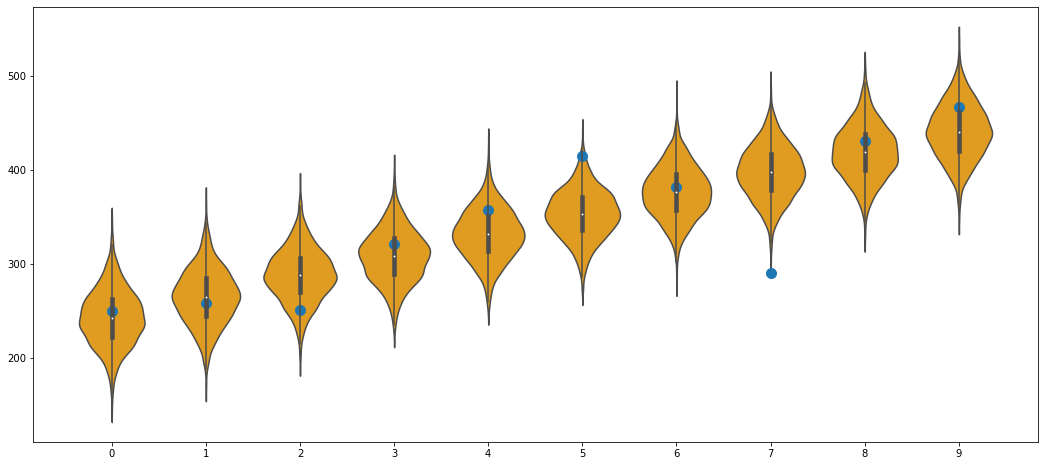

In [26]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_predictive2.iloc[:,0:10],color="orange",alpha=.1)
# plt.xlim([-1,10]);
plt.scatter(df["Days"].iloc[0:10],df["Reaction"].iloc[0:10],s=100)

In [27]:
df_predictive2.iloc[:,0:-1:9]

,0,9,18,27,36,45,54,63,72,81,90,99,108,117,126,135,144,153,162,171
0,221.348404,433.253666,246.868239,282.445644,310.937902,307.160390,292.245885,292.519532,276.779705,263.076046,276.033816,487.560171,290.901720,371.971930,270.702305,368.553967,292.674807,277.752778,280.496889,350.640104
1,258.413680,479.647867,236.739396,228.230304,295.984791,302.726022,294.005879,317.030393,234.883468,307.793491,283.373432,471.571390,271.926775,361.221838,276.661587,329.422782,263.332025,288.959376,240.740170,290.834335
2,288.567813,422.490487,213.809707,257.191777,319.612225,333.073580,297.300195,301.553818,239.664754,231.810743,245.830575,511.998763,319.490291,371.100424,250.030968,323.315774,312.739863,273.836169,275.189358,274.676314
3,283.890856,445.199017,224.260708,219.309550,269.508119,370.562741,341.455671,296.948085,215.581115,262.668222,290.350890,464.209357,279.533002,401.370461,323.116109,365.434542,290.228053,257.434664,277.230596,283.194911
4,263.986215,409.680107,267.257706,201.333204,294.942649,299.010449,326.487260,297.610385,268.206621,281.565483,296.463843,500.943326,323.466014,321.231422,286.393492,335.327485,326.233428,237.289397,316.549128,268.407672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,226.282660,434.575407,231.799141,246.842192,246.578191,290.883729,300.664558,314.631918,231.975686,259.851115,301.855777,438.503573,326.305293,349.609949,296.051838,349.828888,308.394741,292.055677,293.184959,223.828558
1996,258.281744,455.697782,183.353807,190.263747,318.967786,379.320189,279.268834,282.536581,219.274673,291.102847,273.214480,490.457991,332.929112,380.453509,274.412157,328.808764,319.925698,276.326163,241.429999,316.327720
1997,197.016113,429.910705,202.502261,240.220123,331.489253,294.184480,289.686136,380.024646,283.122951,252.158486,327.577578,485.444609,336.468320,345.008464,323.261083,337.609879,276.312284,254.427910,303.122670,283.066146
1998,254.100471,456.429333,209.289761,230.102167,302.191323,327.026908,298.508888,254.295817,225.157136,247.461942,300.434103,413.382526,319.103985,395.569110,249.440583,324.099775,309.090501,238.892008,250.631404,284.554748


In [28]:
my_dict = {i: redo_subject_id(df["Subject"]).count(i) for i in  redo_subject_id(df["Subject"])}

In [29]:
my_dict

{1: 10,
 2: 10,
 3: 10,
 4: 10,
 5: 10,
 6: 10,
 7: 10,
 8: 10,
 9: 10,
 10: 10,
 11: 10,
 12: 10,
 13: 10,
 14: 10,
 15: 10,
 16: 10,
 17: 10,
 18: 10}

In [30]:
df.head(10)

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308
5,6,414.6901,5,308
6,7,382.2038,6,308
7,8,290.1486,7,308
8,9,430.5853,8,308
9,10,466.3535,9,308


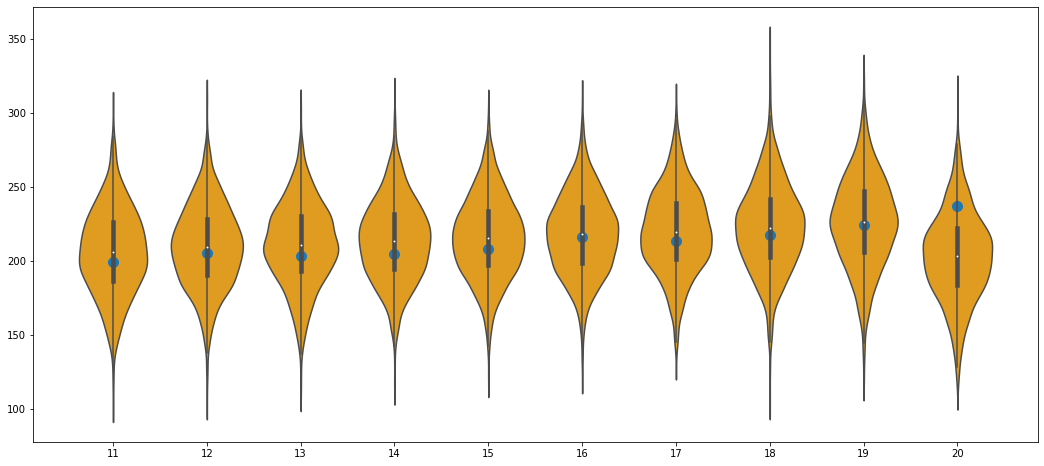

In [41]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_predictive2.iloc[:,11:21],color="orange",alpha=.1)
plt.scatter(df["Days"].iloc[11:21],df["Reaction"].iloc[11:21],s=100)

In [3]:
df

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308
...,...,...,...,...
175,176,329.6076,5,372
176,177,334.4818,6,372
177,178,343.2199,7,372
178,179,369.1417,8,372


In [6]:
df["subject_id"] = redo_subject_id(df["Subject"])
df

,Unnamed: 0,Reaction,Days,Subject,subject_id
0,1,249.5600,0,308,1
1,2,258.7047,1,308,1
2,3,250.8006,2,308,1
3,4,321.4398,3,308,1
4,5,356.8519,4,308,1
...,...,...,...,...,...
175,176,329.6076,5,372,18
176,177,334.4818,6,372,18
177,178,343.2199,7,372,18
178,179,369.1417,8,372,18


In [7]:
df_train = df[df["subject_id"] < 18]
df_train

,Unnamed: 0,Reaction,Days,Subject,subject_id
0,1,249.5600,0,308,1
1,2,258.7047,1,308,1
2,3,250.8006,2,308,1
3,4,321.4398,3,308,1
4,5,356.8519,4,308,1
...,...,...,...,...,...
165,166,284.5120,5,371,17
166,167,259.2658,6,371,17
167,168,304.6306,7,371,17
168,169,350.7807,8,371,17


In [8]:
df_test = df[df["subject_id"] == 18]
df_test

,Unnamed: 0,Reaction,Days,Subject,subject_id
170,171,269.4117,0,372,18
171,172,273.4740,1,372,18
172,173,297.5968,2,372,18
173,174,310.6316,3,372,18
174,175,287.1726,4,372,18
175,176,329.6076,5,372,18
176,177,334.4818,6,372,18
177,178,343.2199,7,372,18
178,179,369.1417,8,372,18
179,180,364.1236,9,372,18


In [20]:
 model_homogeneous = """
    data {
      int N;
      real r[N];
      int days[N];
      int N2; // number of data points in the test set
      int days2[N2]; // time obs in test set
    }
    parameters {
      real alpha;
      real beta;
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha + beta * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ gamma(1,1);
    }
    generated quantities {
        vector[N2] r_simulated;
        
        //generate posterior predictive samples  
        for (t in 1:N2) {
            r_simulated[t] = normal_rng(alpha + beta * days2[t], sigma);
        }
  
    }
"""

In [21]:
 model_heterogeneous = """
    data {
      int N;
      vector[N] r;
      vector[N] days;
      int subject[N];
      int N2; // number of data points in the test set
      vector[N2] days2; // time obs in test set
    }
    parameters {
      real alpha[18];
      real beta[18];
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      sigma ~ normal(0,50);
    }
    generated quantities {
        vector[N2] r_simulated;
        real aAlpha;
        real aBeta;
        
        aAlpha = normal_rng(0,250);
        aBeta = normal_rng(0,250);
        
        //generate posterior predictive samples  
        for (t in 1:N2) {
            r_simulated[t] = normal_rng(aAlpha + aBeta * days2[t], sigma);
        }
  
    }    
"""

In [22]:
# homogeneous
sm_hom = StanModel(model_code=model_homogeneous)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c5aaee9654a91c0810e455798cb3981d NOW.


In [24]:
fit_hom = sm_hom.sampling(
    data=dict(
        N=len(df_train["Reaction"]),
        r=df_train["Reaction"],
        days=df_train["Days"],
        N2=len(df_test["Reaction"]),
        days2=df_test["Days"]
    ),
    warmup=500,
    iter=1000,
    chains=4,
)

In [25]:
# heterogeneous
sm_het = StanModel(model_code=model_heterogeneous)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_df52667faea22335509cc72c9ce9958b NOW.


In [26]:
fit_het = sm_het.sampling(
    data=dict(
        N=len(df_train["Reaction"]),
        r=df_train["Reaction"],
        days=df_train["Days"],
        subject=df_train["subject_id"],
        N2=len(df_test["Reaction"]),
        days2=df_test["Days"]
    ),
    warmup=500,
    iter=1000,
    chains=4,
)

In [27]:
print(fit_hom)

Inference for Stan model: anon_model_c5aaee9654a91c0810e455798cb3981d.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                  mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha           250.51    0.24   7.06 235.97 245.82 250.53 255.42 264.58    892    1.0
beta              10.4    0.05   1.32   7.91   9.51  10.34  11.32  12.99    849    1.0
sigma            49.21    0.08   2.87  44.02  47.21   49.1  51.09  55.16   1313    1.0
r_simulated[1]  250.21    1.13  49.61 153.91 216.86  250.1 282.38 348.57   1937    1.0
r_simulated[2]  262.22     1.1  49.59 161.94 230.44 262.04 296.36 354.57   2035    1.0
r_simulated[3]  272.29    1.17  50.54 172.22 238.58 273.67 306.51 369.35   1854    1.0
r_simulated[4]  281.23     1.1  50.04 184.73 246.63 281.78 314.96 381.51   2067    1.0
r_simulated[5]  293.02    1.13  49.65 196.06 260.23 292.79 326.81 389.64   1939    1.0
r_simulated[6]  301.97    1.18

In [39]:
df_hom_predictive = pd.DataFrame(fit_hom.extract("r_simulated")["r_simulated"])

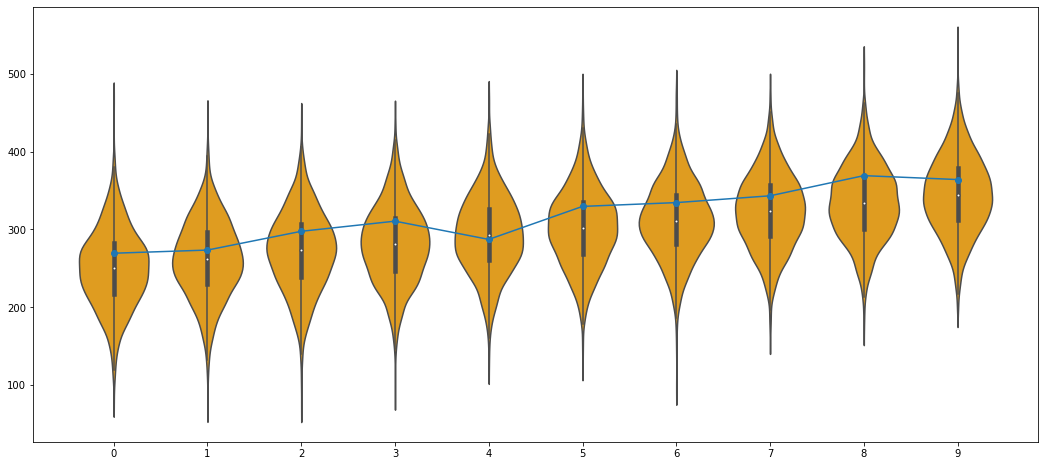

In [40]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_hom_predictive.iloc[:,0:10],color="orange",alpha=.1)
plt.plot(df_test["Days"],df_test["Reaction"],'-o')

In [28]:
print(fit_het)

Inference for Stan model: anon_model_df52667faea22335509cc72c9ce9958b.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                  mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]        242.35    0.38  15.49 211.11 232.29 242.84 252.07 273.99   1683    1.0
alpha[2]        204.42    0.37  15.31 174.05 193.83 204.33 214.91 234.77   1680    1.0
alpha[3]        203.01    0.35  15.28 172.21 192.68 203.02 213.47 233.32   1874    1.0
alpha[4]        288.11    0.39  15.09 257.92 278.08  288.3 298.75  315.8   1514    1.0
alpha[5]        284.47    0.39  15.73 252.89 273.82 284.67 294.76 315.93   1624    1.0
alpha[6]        263.13    0.35  15.32 232.95 252.67 262.97 273.48 292.95   1931    1.0
alpha[7]        273.76     0.4  15.88 242.17 262.99 273.92 283.88  305.5   1554    1.0
alpha[8]        239.02    0.39  15.75 209.23 228.06 238.66 249.56 270.38   1606    1.0
alpha[9]        262.05    0.42

In [42]:
df_het_predictive = pd.DataFrame(fit_het.extract("r_simulated")["r_simulated"])

(-100.0, 500.0)

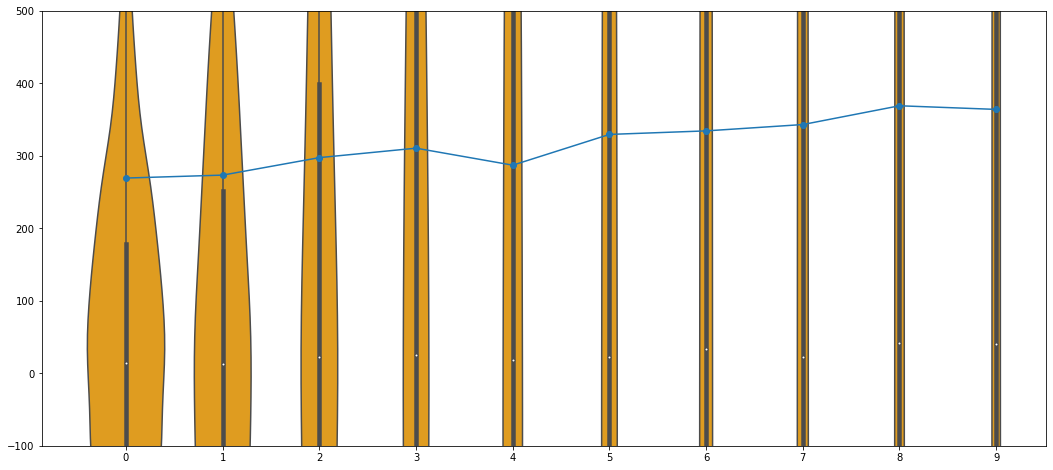

In [44]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_het_predictive.iloc[:,0:10],color="orange",alpha=.1)
plt.plot(df_test["Days"],df_test["Reaction"],'-o')
plt.ylim([-100,500])

homogeneous model performs much better as it's more generalisable to new datasets

In [110]:
 model_hier = """
    data {
      int N;
      vector[N] r;
      vector[N] days;
      int subject[N];
    }
    parameters {
      real alpha[18];
      real beta[18];
      real a;
      real b;
      real c;
      real d;
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N){
              r[t] ~ normal(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
        }
        
        alpha ~ normal(a,b);
        beta ~ normal(c,d);         
        a ~ normal(100,100);
        b ~ cauchy(0,5);
        c ~ normal(10,5);
        d ~ cauchy(0,1);
        sigma ~ normal(0,50);

    }
    generated quantities {
//        vector[N] r_simulated;
        real aBeta;
        
        aBeta = normal_rng(c,d);
        
        //generate posterior predictive samples  
//        for (t in 1:N) {
//            r_simulated[t] = normal_rng(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
//        }
  
    }    
"""

In [111]:
sm_hier = StanModel(model_code=model_hier)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2483df95df29d4f8f71108621e3922d6 NOW.


In [112]:
fit_hier = sm_hier.sampling(
    data=dict(
        N=len(df["Reaction"]),
        r=df["Reaction"],
        days=df["Days"],
        subject=df["subject_id"],
    ),
    warmup=500,
    iter=1000,
    chains=4,
)

In [113]:
print(fit_hier)

Inference for Stan model: anon_model_2483df95df29d4f8f71108621e3922d6.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]  253.36    0.29  12.36 229.66 244.89 253.23 261.36 278.27   1842    1.0
alpha[2]  211.68    0.32  13.42 185.14  202.5 211.67 220.71 237.54   1769    1.0
alpha[3]   213.4    0.32  13.46 187.15 204.01 213.48 222.82 239.42   1799    1.0
alpha[4]  274.06    0.31  12.82 248.65  265.3 273.93  282.8  299.1   1668    1.0
alpha[5]  272.77     0.3  12.67 248.37 263.95 273.03 281.15 297.85   1815    1.0
alpha[6]  259.93    0.28  12.43  235.1 251.74 260.09  268.1 283.21   2025    1.0
alpha[7]  267.61    0.23  12.44  244.3 259.16 267.44 276.36 292.29   2823    1.0
alpha[8]  244.61    0.25   12.7 219.04 236.17 244.93 252.91 268.38   2568    1.0
alpha[9]  250.63    0.27  12.52 225.46 242.43 250.44 259.21 273.83   2189    1.0
alp

In [88]:
df_het_predictive = pd.DataFrame(fit_het.extract("beta")["beta"])
df_hier_predictive = pd.DataFrame(fit_hier.extract("beta")["beta"])

<AxesSubplot:>

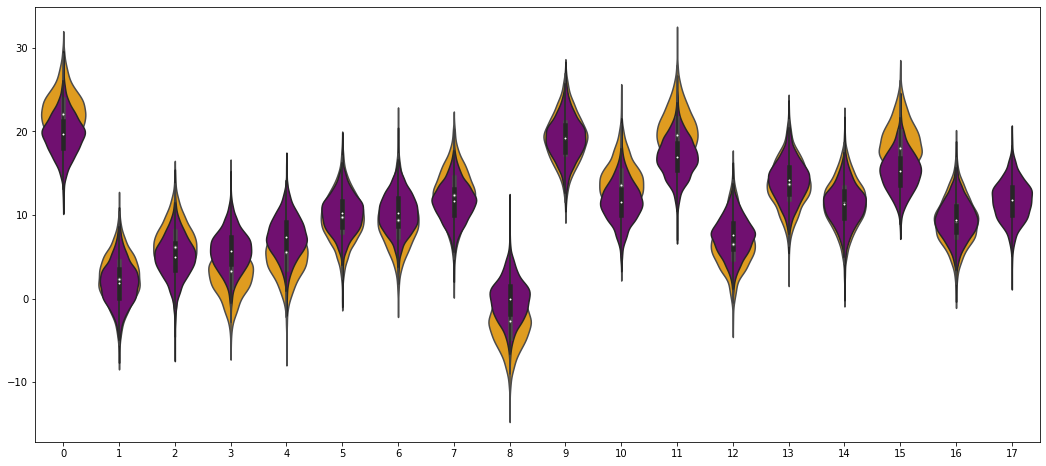

In [104]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_het_predictive.iloc[:,0:17],color="orange",alpha=.1)
sns.violinplot(data=df_hier_predictive.iloc[:,0:18],color="purple",alpha=.1)
# plt.plot(df_test["Days"],df_test["Reaction"],'-o')
# plt.ylim([-100,500])

In [95]:
df_het_predictive

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,22.715681,7.223466,1.937559,-0.737741,1.987121,10.333209,8.615992,16.494846,-4.918788,20.882407,14.154498,16.149378,12.940112,15.130917,9.899760,21.658607,11.043210,-61.307072
1,24.664767,3.235945,11.182759,3.450653,10.137377,9.051221,7.922806,6.280940,-6.527246,15.960790,14.274154,16.958888,6.984123,20.272014,10.427949,14.323224,15.228894,-315.581975
2,24.089418,1.860261,7.504799,1.696127,11.488337,5.795747,11.863076,12.305630,-1.341832,17.650096,12.028411,22.994694,2.385489,9.748056,10.860980,17.382396,9.557055,183.721448
3,21.520841,-1.979542,7.380925,6.186870,2.738347,11.037906,12.731228,18.679732,-3.514567,19.325484,13.450002,19.256068,7.766347,18.106003,9.875067,17.396043,12.392271,-122.999949
4,23.399333,7.174439,9.629967,0.300803,5.156712,10.325219,14.373612,9.111084,1.004777,20.015372,18.262719,17.443850,4.929615,13.392735,9.370211,18.233395,8.354626,-77.963338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,21.571252,1.968498,6.324990,3.644668,1.645807,5.357459,8.765970,10.328062,-1.723697,16.099149,11.671835,17.623471,5.037113,14.643710,12.677415,17.298776,14.439028,-25.741756
1996,21.662792,6.002635,5.460471,1.515478,6.708964,10.911414,7.435516,13.159690,-6.439154,19.108154,8.036137,16.009799,7.852420,18.107237,9.993992,19.201487,7.620277,120.711097
1997,21.358494,-1.070474,4.992661,6.071432,3.877359,10.301471,7.694426,12.854912,-4.141209,17.538462,10.786518,17.133818,4.586575,13.608212,13.779191,18.558724,7.493481,-421.966259
1998,22.490949,9.101657,4.525047,5.821247,5.223938,10.523055,7.361240,12.747657,-5.110230,22.777604,11.783368,22.899564,8.431331,12.622039,13.469053,20.778613,10.493321,-44.790050


In [96]:
df_hier_predictive

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19.973845,-1.876741,2.563480,0.842785,6.250144,7.247376,5.729503,11.504372,-1.950658,19.671667,10.934751,15.923129,6.985541,14.026605,12.425639,14.585478,7.087948,8.061999
1,20.367859,1.775692,5.779270,4.865322,9.565477,13.607588,7.532965,16.016561,0.855046,20.937018,13.740233,19.778212,11.826035,16.069264,11.810700,11.001636,13.778179,11.781952
2,18.002141,2.224200,-0.557558,1.611502,2.727004,7.717320,9.406637,16.424464,-1.635490,20.807790,8.321712,13.229876,8.727538,15.043585,12.421801,12.677732,6.497920,8.463697
3,14.721264,-1.545405,6.123333,4.502881,5.824709,13.277837,10.763145,10.054360,-0.571696,23.601221,10.267578,20.894036,7.862974,9.392613,12.219405,15.690277,11.820438,11.110426
4,21.583450,2.608639,7.260522,5.334954,2.923855,10.345292,7.768930,13.803263,-6.914152,17.344458,11.444985,18.412448,8.449218,11.097645,9.492693,14.133739,6.649013,10.385596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,22.027108,-2.762429,-0.791325,8.012707,6.191280,9.304966,11.005941,12.557201,-1.443343,20.646547,13.547873,15.796195,8.255457,11.503271,11.831019,16.978180,12.616613,14.142482
1996,17.524385,-1.564009,6.395151,4.941123,6.383551,9.910816,10.167173,15.112132,-5.585761,18.213943,16.932787,16.142630,9.040760,15.013382,10.006510,16.834072,11.964176,11.055873
1997,18.188743,2.605527,7.554477,7.866930,8.147476,10.108859,7.837309,6.605038,-1.992472,13.935446,13.819618,17.136318,6.708574,11.699108,10.129938,16.129768,6.267523,8.405168
1998,23.232232,-0.230194,-0.941001,8.251673,7.219764,9.546883,8.711915,8.773225,-4.192355,18.315342,9.058390,15.195053,6.166243,17.143350,9.607720,14.946108,11.072685,11.645333


<AxesSubplot:>

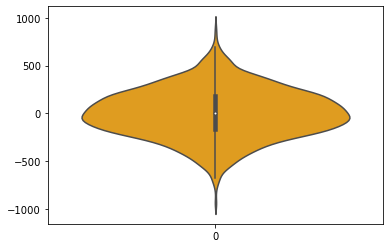

In [105]:
sns.violinplot(data=df_het_predictive.iloc[:,17],color="orange",alpha=.1)

<AxesSubplot:>

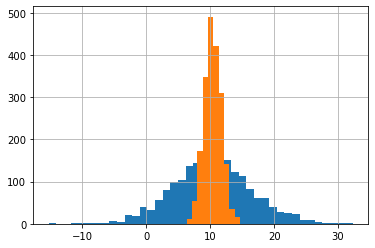

In [124]:
fit_hier.to_dataframe()["aBeta"].hist(bins=40)
fit_hom.to_dataframe()["beta"].hist(bins=10)

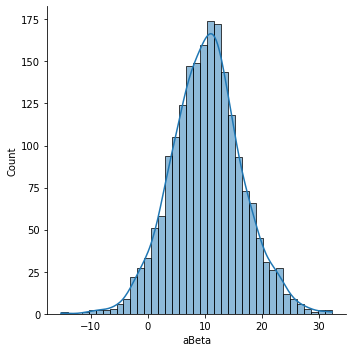

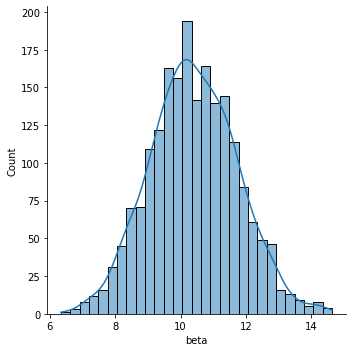

In [118]:
sns.displot(fit_hier.to_dataframe()["aBeta"],kde=True)
sns.displot(fit_hom.to_dataframe()["beta"],kde=True)

## 17.3 Hierarchical ODEs: bacterial cell population growth

In [2]:
df = pd.read_csv("../all_data/hierarchical_ode.csv")
df

,Unnamed: 0,V1,V2,V3,V4,V5,time
0,1,4.809621,4.538929,5.529317,5.131033,5.231101,0.1
1,2,4.151672,5.825240,5.305460,5.381488,5.899066,0.2
2,3,5.644281,5.547855,6.180493,5.152891,5.078621,0.3
3,4,5.841844,6.552932,5.507744,5.406661,5.507618,0.4
4,5,5.005198,5.068168,6.298994,5.793250,4.752301,0.5
...,...,...,...,...,...,...,...
95,96,8.728886,7.736955,11.382547,12.745005,7.479495,9.6
96,97,8.002334,8.677325,11.882754,12.706334,7.452748,9.7
97,98,9.089271,8.085688,11.228556,12.079780,7.804624,9.8
98,99,8.686752,7.511824,11.035741,12.241480,6.517964,9.9


In [26]:
model_code = """
    functions{
        real[] bacteria_deriv(real t, real[] y, real[] theta, real[] x_r, int[] x_i){
            real dydt[1];
            // dN/dt = alpha*N*(1 - beta*N)
            // here N = y; alpha,beta = theta[1],theta[2]
            dydt[1] = theta[1] * y[1] * (1 - theta[2] * y[1]);
            
            return dydt;
        }
    }

    data {
      int<lower=1> T;
      int<lower=0> N;
      real t0;
      real ts[T];
      matrix[T,N] y;
    }
    
    transformed data {
        real x_r[0];
        int x_i[0];
    }
    
    parameters {
        real<lower=0, upper=2> theta[2]; // contains parameters (alpha,beta)
        real<lower=0> sigma;
        real<lower=0, upper=10> y0[1];
    }
    model {
        real y_hat[T, 1];
        sigma ~ cauchy(0, 1);
        theta ~ normal(0, 2);
        y0 ~ normal(5, 2);
        
        y_hat = integrate_ode(bacteria_deriv, y0, t0, ts, theta, x_r, x_i);
        
        for (i in 1:N)
            for (t in 1:T)
                y[t, i] ~ normal(y_hat[t, 1], sigma);
    }
    
// use this to capture the log-likelihood for later parts of the question
//    generated quantities {
//        vector[N * T] logLikelihood;
//        int k;
//        real y_hat[T, 1];
//        
//        k = 1;
//        y_hat = integrate_ode(bacteria_deriv, y0, t0, ts, theta, x_r, x_i);
//        
//        for (i in 1:N){
//            for (t in 1:T){
//                logLikelihood[k] = normal_log(y[t, i], y_hat[t, 1], sigma);
//                k = k + 1;
//            }
//       }
//    }
"""

In [27]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_36dd36c07b46ff1486fef5a7c2b78677 NOW.


In [44]:
fit = sm.sampling(
    data=dict(
        T=len(df["time"]),
        N=len(df.columns)-2,
        t0=0,
        ts=df["time"].values,
        y=df[df.columns[1:-1]].values,
    ),
    warmup=500,
    iter=3000,
    chains=4,
)

In [45]:
fit

Inference for Stan model: anon_model_36dd36c07b46ff1486fef5a7c2b78677.
4 chains, each with iter=3000; warmup=500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1]   0.55  1.2e-3   0.08   0.41    0.5   0.55    0.6   0.72   4298    1.0
theta[2]    0.1  2.4e-5 1.7e-3    0.1    0.1    0.1    0.1   0.11   4835    1.0
sigma      1.66  6.4e-4   0.05   1.57   1.63   1.66    1.7   1.77   6552    1.0
y0[1]       5.0  3.9e-3   0.28   4.44   4.81   5.01   5.19   5.52   5036    1.0
lp__     -507.8    0.02   1.42 -511.3 -508.5 -507.4 -506.7 -506.0   4078    1.0

Samples were drawn using NUTS at Wed Jan 27 21:39:38 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

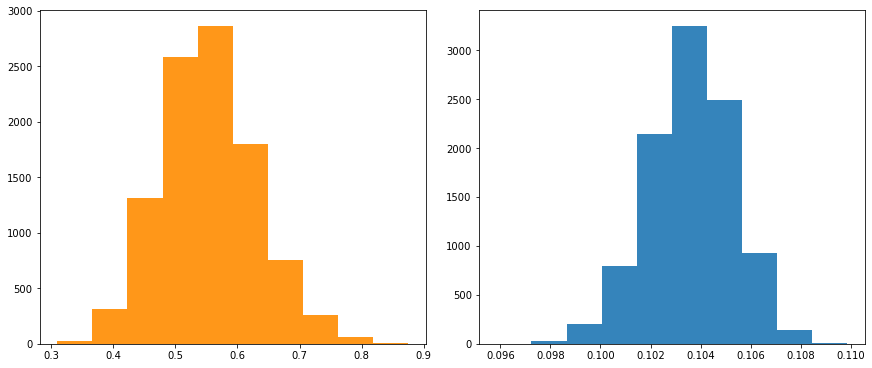

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
axs[0].hist(fit.extract("theta[1]")["theta[1]"],facecolor="darkorange", alpha=.9);
axs[1].hist(fit.extract("theta[2]")["theta[2]"],alpha=.9);

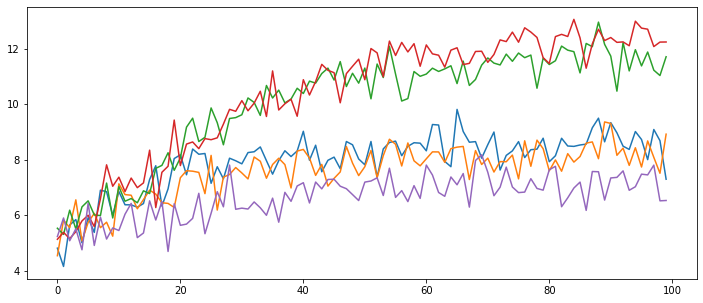

In [53]:
plt.figure(figsize=(12,5))
plt.plot(df[df.columns[1:-1]]);

In [60]:
model_het = """
    functions{
        real[] bacteria_deriv(real t, real[] y, real[] theta, real[] x_r, int[] x_i){
            real dydt[1];
            // dN/dt = alpha*N*(1 - beta*N)
            // here N = y; alpha,beta = theta[1],theta[2]
            dydt[1] = theta[1] * y[1] * (1 - theta[2] * y[1]);
            
            return dydt;
        }
    }

    data {
      int<lower=1> T;
      int<lower=0> N;
      real t0;
      real ts[T];
      matrix[T,N] y;
    }
    
    transformed data {
        real x_r[0];
        int x_i[0];
    }
    
    parameters {
        real<lower=0, upper=2> theta[N,2]; // contains parameters (alpha,beta)
        real<lower=0> sigma;
        real<lower=0, upper=10> y0[1];
    }
    model {
        real y_hat[T, 1];
        sigma ~ cauchy(0, 1);
        y0 ~ normal(5, 2);

        for (i in 1:N){
            theta[i] ~ normal(0, 2);
            y_hat = integrate_ode(bacteria_deriv, y0, t0, ts, theta[i], x_r, x_i);
            for (t in 1:T){
                y[t, i] ~ normal(y_hat[t, 1], sigma);
            }
        }
    }
    
    generated quantities {
        vector[N * T] logLikelihood;
        int k;
        real y_hat[T, 1];
        
        k = 1;
        for (i in 1:N){
            y_hat = integrate_ode(bacteria_deriv, y0, t0, ts, theta[i], x_r, x_i);
            for (t in 1:T){
                logLikelihood[k] = normal_log(y[t, i], y_hat[t, 1], sigma);
                k = k + 1;
            }
       }
    }
"""

In [61]:
sm_het = StanModel(model_code=model_het)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b9445386632acb5ff8835c047a1a7fbc NOW.


In [66]:
fit_het = sm_het.sampling(
    data=dict(
        T=len(df["time"]),
        N=len(df.columns)-2,
        t0=0,
        ts=df["time"].values,
        y=df[df.columns[1:-1]].values,
    ),
    warmup=1000,
    iter=5000,
    chains=4,
)

In [67]:
print(fit_het)

Inference for Stan model: anon_model_b9445386632acb5ff8835c047a1a7fbc.
4 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=16000.

                     mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1,1]           0.75  5.4e-4   0.06   0.63   0.71   0.75   0.79   0.89  13920    1.0
theta[2,1]           0.65  5.6e-4   0.06   0.53    0.6   0.64   0.69   0.78  12920    1.0
theta[3,1]           0.59  2.2e-4   0.02   0.54   0.57   0.59    0.6   0.64  12090    1.0
theta[4,1]           0.53  1.8e-4   0.02   0.49   0.51   0.53   0.54   0.57  12770    1.0
theta[5,1]           0.43  5.4e-4   0.06   0.32   0.39   0.43   0.47   0.56  12970    1.0
theta[1,2]           0.12  7.8e-6 1.0e-3   0.12   0.12   0.12   0.12   0.12  16848    1.0
theta[2,2]           0.12  9.9e-6 1.2e-3   0.12   0.12   0.12   0.12   0.12  15218    1.0
theta[3,2]           0.09  5.2e-6 6.6e-4   0.08   0.08   0.09   0.09   0.09  15994    1.0


<AxesSubplot:>

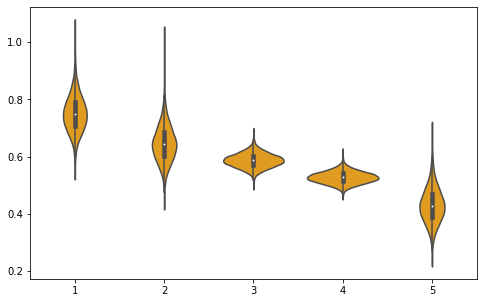

In [125]:
plt.figure(figsize=(8,5))

alpha_data = pd.DataFrame()
beta_data = pd.DataFrame()
for i in [1,2,3,4,5]:
    alpha_data[f"{i}"] = fit_het.extract(f"theta[{i},1]")[f"theta[{i},1]"]
    beta_data[f"{i}"] = fit_het.extract(f"theta[{i},2]")[f"theta[{i},2]"]

sns.violinplot(data=alpha_data,color="orange",alpha=.1)

<AxesSubplot:>

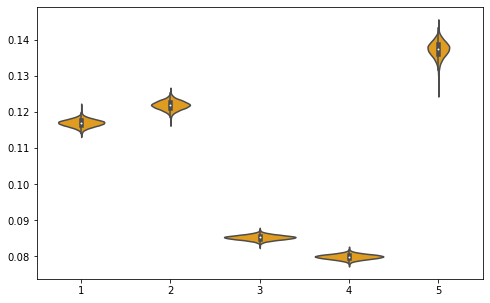

In [127]:
plt.figure(figsize=(8,5))

sns.violinplot(data=beta_data,color="orange",alpha=.1)

In [3]:
model_hier = """
    functions{
        real[] bacteria_deriv(real t, real[] y, real[] theta, real[] x_r, int[] x_i){
            real dydt[1];
            // dN/dt = alpha*N*(1 - beta*N)
            // here N = y; alpha,beta = theta[1],theta[2]
            dydt[1] = theta[1] * y[1] * (1 - theta[2] * y[1]);
            
            return dydt;
        }
    }

    data {
      int<lower=1> T;
      int<lower=0> N;
      real t0;
      real ts[T];
      matrix[T,N] y;
    }
    
    transformed data {
        real x_r[0];
        int x_i[0];
    }
    
    parameters {
        real<lower=0> a1[2];
        real<lower=0> a2[2];
        real<lower=0, upper=2> theta[N,2]; // contains parameters (alpha,beta)
        real<lower=0> sigma;
        real<lower=0, upper=10> y0[1];
    }
    model {
        real y_hat[T, 1];
        a1[1] ~ normal(20, 5);
        a1[2] ~ normal(40, 5);
        a2[1] ~ normal(10, 3);
        a2[2] ~ normal(100, 5);
        sigma ~ cauchy(0, 1);
        y0 ~ normal(5, 2);

        for (i in 1:N){
            theta[i, 1] ~ gamma(a1[1], a1[2]);
            theta[i, 2] ~ gamma(a2[1], a2[2]);
            y_hat = integrate_ode(bacteria_deriv, y0, t0, ts, theta[i], x_r, x_i);
            for (t in 1:T){
                y[t, i] ~ normal(y_hat[t, 1], sigma);
            }
        }
    }
    
    generated quantities {
        vector[N * T] logLikelihood;
        int k;
        real y_hat[T, 1];
        real aTheta[2];
        real y_hat_overall[T, 1];
        
        aTheta[1] = gamma_rng(a1[1], a1[2]);
        aTheta[2] = gamma_rng(a2[1], a2[2]);
        y_hat_overall = integrate_ode(bacteria_deriv, y0, t0, ts, aTheta, x_r, x_i);
        k = 1;
        for (i in 1:N){
            y_hat = integrate_ode(bacteria_deriv, y0, t0, ts, theta[i], x_r, x_i);
            for (t in 1:T){
                logLikelihood[k] = normal_log(y[t, i], y_hat[t, 1], sigma);
                k = k + 1;
            }
       }
    }
"""

In [4]:
sm_hier = StanModel(model_code=model_hier)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c25e6ce7f9ed5327b2be6a03a6e66795 NOW.


In [5]:
fit_hier = sm_hier.sampling(
    data=dict(
        T=len(df["time"]),
        N=len(df.columns)-2,
        t0=0,
        ts=df["time"].values,
        y=df[df.columns[1:-1]].values,
    ),
    warmup=1000,
    iter=5000,
    chains=4,
)

In [6]:
print(fit_hier)

Inference for Stan model: anon_model_c25e6ce7f9ed5327b2be6a03a6e66795.
4 chains, each with iter=5000; warmup=1000; thin=1; 
post-warmup draws per chain=4000, total post-warmup draws=16000.

                       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a1[1]                 22.62    0.02   2.94  16.96  20.61  22.58  24.58  28.56  15905    1.0
a1[2]                 39.34    0.03   4.42  30.68  36.34  39.29  42.31  48.09  17553    1.0
a2[1]                 10.96  9.2e-3   1.36   8.35  10.03  10.94  11.87   13.7  22075    1.0
a2[2]                100.15    0.03    4.9  90.69  96.87 100.12 103.48 109.84  22091    1.0
theta[1,1]             0.72  4.6e-4   0.06   0.61   0.68   0.72   0.75   0.84  15669    1.0
theta[2,1]             0.63  4.6e-4   0.06   0.52   0.59   0.62   0.66   0.74  14762    1.0
theta[3,1]             0.58  2.2e-4   0.02   0.54   0.57   0.58    0.6   0.63  12485    1.0
theta[4,1]             0.53  1.7e-4   0.02   0.49   0.51   0.53   0.54   0

<AxesSubplot:>

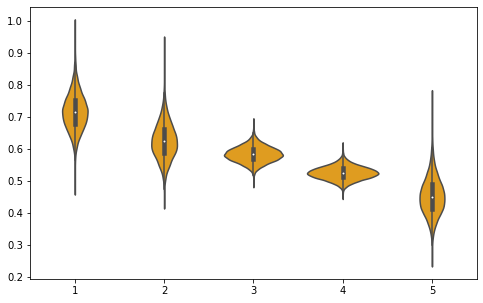

In [7]:
plt.figure(figsize=(8,5))

alpha_data = pd.DataFrame()
beta_data = pd.DataFrame()
for i in [1,2,3,4,5]:
    alpha_data[f"{i}"] = fit_hier.extract(f"theta[{i},1]")[f"theta[{i},1]"]
    beta_data[f"{i}"] = fit_hier.extract(f"theta[{i},2]")[f"theta[{i},2]"]

sns.violinplot(data=alpha_data,color="orange",alpha=.1)

<AxesSubplot:>

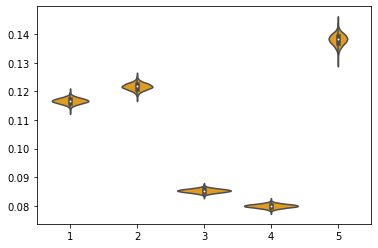

In [8]:
sns.violinplot(data=beta_data,color="orange",alpha=.1)

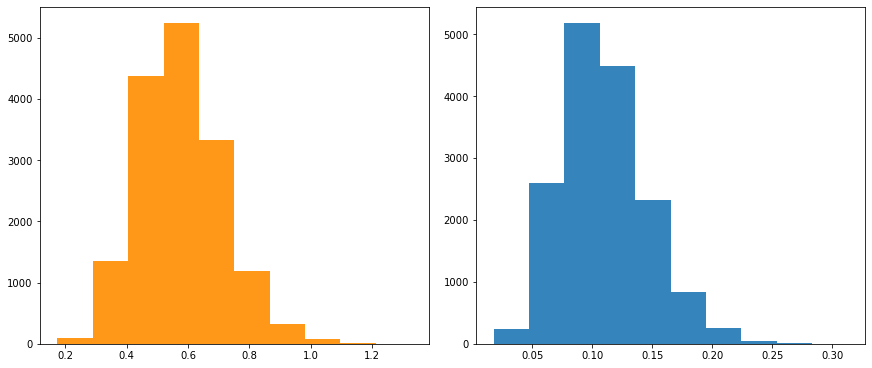

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)
axs[0].hist(fit_hier.extract("aTheta[1]")["aTheta[1]"],facecolor="darkorange", alpha=.9);
axs[1].hist(fit_hier.extract("aTheta[2]")["aTheta[2]"],alpha=.9);

## 17.4 Bowel cancer model selection

In [3]:
df = pd.read_csv("../all_data/hierarchical_cancer.csv")
df

,Unnamed: 0,X,N
0,1,0,41
1,2,3,55
2,3,12,45
3,4,8,52
4,5,16,48
...,...,...,...
995,996,5,45
996,997,1,54
997,998,8,49
998,999,0,54


In [4]:
 model_code = """
    data {
      int K;
      vector[K] N;
      int X[K];
    }
    parameters {
      real<lower=0> lambda;
    }
    model {
      X ~ poisson(N*lambda);
      lambda ~ normal(0.5,0.5);
    }
    generated quantities{
        vector[K] lLoglikelihood;
        for(i in 1:K)
            lLoglikelihood[i] = poisson_lpmf(X[i] | N[i] * lambda);
    }    
"""

In [5]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f36e1a093bdde558457707c3349eb9be NOW.


In [6]:
fit = sm.sampling(
    data=dict(
        K=len(df["N"]),
        N=df["N"].values,
        X=df["X"].values,
    ),
    warmup=500,
    iter=3000,
    chains=4,
)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [7]:
print(fit)

Inference for Stan model: anon_model_f36e1a093bdde558457707c3349eb9be.
4 chains, each with iter=3000; warmup=500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

                       mean se_mean      sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda                  0.1  2.3e-5  1.4e-3    0.1    0.1    0.1    0.1   0.11   3818    1.0
lLoglikelihood[1]     -4.24  9.4e-4    0.06  -4.35  -4.28  -4.24   -4.2  -4.13   3818    1.0
lLoglikelihood[2]     -2.26  5.9e-4    0.04  -2.34  -2.29  -2.26  -2.24  -2.19   3818    1.0
lLoglikelihood[3]     -6.19  1.6e-3     0.1  -6.39  -6.26   -6.2  -6.13   -6.0   3819    1.0
lLoglikelihood[4]     -2.53  5.8e-4    0.04   -2.6  -2.55  -2.53   -2.5  -2.46   3820    1.0
lLoglikelihood[5]    -10.01  2.4e-3    0.15  -10.3 -10.11 -10.01  -9.91  -9.71   3818    1.0
lLoglikelihood[6]     -1.67  1.2e-4  7.5e-3  -1.68  -1.67  -1.67  -1.66  -1.65   3821    1.0
lLoglikelihood[7]     -5.27  1.2e-3    0.07  -5.41  -5.32  -5.27  -

In [8]:
bFit = sm.optimizing(data=dict(K=len(df["N"]),N=df["N"].values,X=df["X"].values))
likelihoodBayes = np.sum(bFit["lLoglikelihood"])
likelihoodBayes

-3994.717374163755

In [9]:
dic_fit = sm.sampling(data=dict(K=len(df["N"]),N=df["N"].values,X=df["X"].values), iter=200, chains=4)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [10]:
lLoglikelihood = fit.extract("lLoglikelihood")["lLoglikelihood"]
aLoglikelihood = np.sum(lLoglikelihood,axis=1)

In [11]:
DIC = likelihoodBayes - 2*aLoglikelihood.var()
DIC

-3995.645704970075

In [12]:
 model_aic = """
    data {
      int K;
      vector[K] N;
      int X[K];
    }
    parameters {
      real<lower=0> lambda;
    }
    model {
      X ~ poisson(N*lambda);
      // lambda ~ normal(0.5,0.5);
    }
    generated quantities{
        vector[K] lLoglikelihood;
        for(i in 1:K)
            lLoglikelihood[i] = poisson_lpmf(X[i] | N[i] * lambda);
    }    
"""

In [13]:
sm_aic = StanModel(model_code=model_aic)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bd98d03d7f54a8ea8a5b515288c9abbd NOW.


In [14]:
bFit_aic = sm_aic.optimizing(data=dict(K=len(df["N"]),N=df["N"].values,X=df["X"].values))
likelihoodBayes_aic = np.sum(bFit_aic["lLoglikelihood"])

In [15]:
AIC = likelihoodBayes_aic -1  
AIC

-3995.717370942357

In [16]:
DIC < AIC

False

In [17]:
loo, _, _ = psisloo(lLoglikelihood)
loo

-3997.988385298513

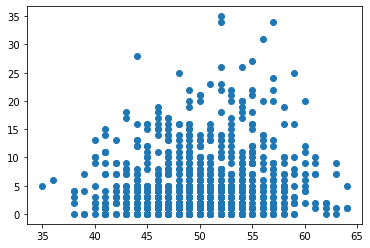

In [18]:
plt.scatter(df["N"],df["X"])

In [19]:
from sklearn.model_selection import KFold

In [45]:
kf = KFold(n_splits=10,shuffle=True)

In [58]:
 model_folds = """
    data {
      int Ktrain;
      vector[Ktrain] Ntrain;
      int Xtrain[Ktrain];
      
      // hold out set
      int KTest;
      vector[KTest] NTest;
      int XTest[KTest];      
    }
    parameters {
      real<lower=0> lambda;
    }
    model {
      Xtrain ~ poisson(Ntrain*lambda);
      lambda ~ normal(0.5,0.5);
    }
    generated quantities{
        vector[KTest] lLoglikelihood;
        for(i in 1:KTest)
            lLoglikelihood[i] = poisson_lpmf(XTest[i] | NTest[i] * lambda);
    }    
"""

In [59]:
sm_cv = StanModel(model_code=model_folds)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9bf9add2a829d55890ac2200be0c8f38 NOW.


In [61]:
vLoglikelihood = []
for train_index, test_index in kf.split(df):
    N_train, N_test = df["N"].iloc[train_index], df["N"].iloc[test_index]
    x_train, x_test = df["X"].iloc[train_index], df["X"].iloc[test_index]
    
    fit_cv = sm_cv.sampling(
        data=dict(
            Ktrain=len(N_train),
            Ntrain=N_train,
            Xtrain=x_train,
            KTest=len(N_test),
            NTest=N_test,
            XTest=x_test,
        ),
        warmup=500,
        iter=3000,
        chains=4,
    )
    vLoglikelihood.append(fit_cv.extract("lLoglikelihood")["lLoglikelihood"])

In [64]:
np.shape(vLoglikelihood)

(10, 10000, 100)

In [74]:
aLogTotal = 0
for i in range(0,10):
    aLogLikeTemp = vLoglikelihood[i]
    aLogTotal = aLogTotal +  np.sum(aLogLikeTemp.mean(axis=0))

In [75]:
aLogTotal

-3997.008997436626

In [76]:
model_two = """
    data{
        int KTrain;
        vector[KTrain] NTrain;
        int XTrain[KTrain];
        // hold out set
        int KTest;
        vector[KTest] NTest;
        int XTest[KTest];
    }
    parameters{
        real<lower=0> lambda;
        real<lower=0> kappa;
    }
    model{
        XTrain ~ neg_binomial_2(lambda * NTrain, kappa);
        lambda ~ normal(0.5, 0.5);
        kappa ~ lognormal(0, 0.5);
    }
    generated quantities{
        vector[KTest] lLoglikelihood;
        for(i in 1:KTest)
            lLoglikelihood[i] = neg_binomial_2_lpmf(XTest[i] | NTest[i] * lambda,kappa);
    }
"""

In [77]:
sm_two = StanModel(model_code=model_two)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5ebe5f4fe4a7150ee3b609dab110c8a7 NOW.


In [79]:
vLoglikelihood_two = []
for train_index, test_index in kf.split(df):
    N_train, N_test = df["N"].iloc[train_index], df["N"].iloc[test_index]
    x_train, x_test = df["X"].iloc[train_index], df["X"].iloc[test_index]
    
    fit_two = sm_two.sampling(
        data=dict(
            KTrain=len(N_train),
            NTrain=N_train,
            XTrain=x_train,
            KTest=len(N_test),
            NTest=N_test,
            XTest=x_test,
        ),
        warmup=500,
        iter=3000,
        chains=4,
    )
    vLoglikelihood_two.append(fit_two.extract("lLoglikelihood")["lLoglikelihood"])

In [80]:
aLogTotal_two = 0
for i in range(0,10):
    aLogLikeTemp = vLoglikelihood_two[i]
    aLogTotal_two = aLogTotal_two +  np.sum(aLogLikeTemp.mean(axis=0))

In [81]:
aLogTotal_two

-2732.531418640168

In [82]:
z = np.sum(vLoglikelihood[1] - vLoglikelihood_two[1])/(
    np.sqrt(len(vLoglikelihood[i])) * np.std(vLoglikelihood[1] - vLoglikelihood_two[1]))

In [86]:
from scipy.stats import norm

In [88]:
norm.cdf(z)

0.0

In [4]:
 model_code = """
    data {
      int K;
      vector[K] N;
      int X[K];
    }
    parameters {
      real<lower=0> lambda;
    }
    model {
      X ~ poisson(N*lambda);
      lambda ~ normal(0.5,0.5);
    }
    generated quantities{
        real loglikelihood;
        real<lower=0> lambda1;
        lambda1 = normal_rng(0.5, 0.5);
        
        while(lambda1 <= 0)
            lambda1 = normal_rng(0.5, 0.5);
       
        loglikelihood = 0; 
        for(i in 1:K)
            loglikelihood = loglikelihood + poisson_lpmf(X[i] | lambda1 * N[i]);
    }   
"""

In [5]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5b50ea7f77b99b664b10e5cf8ea4e534 NOW.


In [6]:
fit = sm.sampling(
    data=dict(
        K=len(df["N"]),
        N=df["N"].values,
        X=df["X"].values,
    ),
    warmup=500,
    iter=3000,
    chains=4,
)

In [7]:
print(fit)

Inference for Stan model: anon_model_5b50ea7f77b99b664b10e5cf8ea4e534.
4 chains, each with iter=3000; warmup=500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda           0.1  2.5e-5 1.4e-3    0.1    0.1    0.1    0.1   0.11   3458    1.0
loglikelihood -2.3e4  160.16  1.6e4 -6.1e4 -3.3e4 -2.0e4  -9678  -4084   9891    1.0
lambda1         0.64  4.0e-3    0.4   0.04   0.33    0.6    0.9   1.52   9876    1.0
lp__          3351.7    0.01    0.7 3349.7 3351.5 3352.0 3352.2 3352.2   4092    1.0

Samples were drawn using NUTS at Sun Jan 31 10:50:36 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [8]:
from scipy.special import logsumexp

In [10]:
poisson_marginal_likelihood = logsumexp(fit.extract("loglikelihood")["loglikelihood"])
poisson_marginal_likelihood

-3991.4114290156053

In [17]:
model_two = """
    data{
        int K;
        vector[K] N;
        int X[K];
    }
    parameters{
        real<lower=0> lambda;
        real<lower=0> kappa;
    }
    model{
        X ~ neg_binomial_2(lambda * N, kappa);
        lambda ~ normal(0.5, 0.5);
        kappa ~ lognormal(0, 0.5);
    }
    generated quantities{
        real loglikelihood;
        real<lower=0> lambda1;
        real<lower=0> kappa1;
        lambda1 = normal_rng(0.5, 0.5);
        kappa1 = lognormal_rng(0, 0.5);
        
        while(lambda1 <= 0)
            lambda1 = normal_rng(0.5, 0.5);
       
        loglikelihood = 0; 
        for(i in 1:K)
            loglikelihood = loglikelihood + neg_binomial_2_lpmf(X[i] | N[i] * lambda1,kappa1);
    }
"""

In [18]:
sm2 = StanModel(model_code=model_two)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0f9100669cde3631d4c5b72dcbd7c4ce NOW.


In [19]:
fit2 = sm2.sampling(
    data=dict(
        K=len(df["N"]),
        N=df["N"].values,
        X=df["X"].values,
    ),
    warmup=500,
    iter=3000,
    chains=4,
)

In [20]:
print(fit2)

Inference for Stan model: anon_model_0f9100669cde3631d4c5b72dcbd7c4ce.
4 chains, each with iter=3000; warmup=500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda           0.1  3.8e-5 3.5e-3    0.1    0.1    0.1   0.11   0.11   8166    1.0
kappa           1.06  6.8e-4   0.06   0.95   1.02   1.06    1.1   1.18   7791    1.0
loglikelihood  -3759    9.26  931.7  -5845  -4083  -3574  -3198  -2771  10127    1.0
lambda1         0.65  3.9e-3    0.4   0.04   0.33    0.6    0.9   1.51  10343    1.0
kappa1          1.14  6.3e-3   0.61   0.38   0.72    1.0   1.41   2.71   9402    1.0
lp__          4616.3    0.02    1.0 4613.7 4616.0 4616.7 4617.0 4617.3   4242    1.0

Samples were drawn using NUTS at Sun Jan 31 11:04:32 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rh

In [21]:
negbin_marginal_likelihood = logsumexp(fit2.extract("loglikelihood")["loglikelihood"])
negbin_marginal_likelihood

-2727.4868206175233

In [35]:
logBF = negbin_marginal_likelihood - poisson_marginal_likelihood
logBF

1263.924608398082

In [2]:
def psisloo(log_lik, **kwargs):
    r"""PSIS leave-one-out log predictive densities.
    Computes the log predictive densities given posterior samples of the log
    likelihood terms :math:`p(y_i|\theta^s)` in input parameter `log_lik`.
    Returns a sum of the leave-one-out log predictive densities `loo`,
    individual leave-one-out log predictive density terms `loos` and an estimate
    of Pareto tail indeces `ks`. The estimates are unreliable if tail index
    ``k > 0.7`` (see more in the references listed in the module docstring).
    Additional keyword arguments are passed to the :meth:`psislw()` function
    (see the corresponding documentation).
    Parameters
    ----------
    log_lik : ndarray
        Array of size n x m containing n posterior samples of the log likelihood
        terms :math:`p(y_i|\theta^s)`.
    Returns
    -------
    loo : scalar
        sum of the leave-one-out log predictive densities
    loos : ndarray
        individual leave-one-out log predictive density terms
    ks : ndarray
        estimated Pareto tail indeces
    """
    # ensure overwrite flag in passed arguments
    kwargs['overwrite_lw'] = True
    # log raw weights from log_lik
    lw = -log_lik
    # compute Pareto smoothed log weights given raw log weights
    lw, ks = psislw(lw, **kwargs)
    # compute
    lw += log_lik
    loos = sumlogs(lw, axis=0)
    loo = loos.sum()
    return loo, loos, ks


def psislw(lw, Reff=1.0, overwrite_lw=False):
    """Pareto smoothed importance sampling (PSIS).
    Parameters
    ----------
    lw : ndarray
        Array of size n x m containing m sets of n log weights. It is also
        possible to provide one dimensional array of length n.
    Reff : scalar, optional
        relative MCMC efficiency ``N_eff / N``
    overwrite_lw : bool, optional
        If True, the input array `lw` is smoothed in-place, assuming the array
        is F-contiguous. By default, a new array is allocated.
    Returns
    -------
    lw_out : ndarray
        smoothed log weights
    kss : ndarray
        Pareto tail indices
    """
    if lw.ndim == 2:
        n, m = lw.shape
    elif lw.ndim == 1:
        n = len(lw)
        m = 1
    else:
        raise ValueError("Argument `lw` must be 1 or 2 dimensional.")
    if n <= 1:
        raise ValueError("More than one log-weight needed.")

    if overwrite_lw and lw.flags.f_contiguous:
        # in-place operation
        lw_out = lw
    else:
        # allocate new array for output
        lw_out = np.copy(lw, order='F')

    # allocate output array for kss
    kss = np.empty(m)

    # precalculate constants
    cutoff_ind = - int(np.ceil(min(0.2 * n, 3 * np.sqrt(n / Reff)))) - 1
    cutoffmin = np.log(np.finfo(float).tiny)
    logn = np.log(n)
    k_min = 1/3

    # loop over sets of log weights
    for i, x in enumerate(lw_out.T if lw_out.ndim == 2 else lw_out[None, :]):
        # improve numerical accuracy
        x -= np.max(x)
        # sort the array
        x_sort_ind = np.argsort(x)
        # divide log weights into body and right tail
        xcutoff = max(
            x[x_sort_ind[cutoff_ind]],
            cutoffmin
        )
        expxcutoff = np.exp(xcutoff)
        tailinds, = np.where(x > xcutoff)
        x2 = x[tailinds]
        n2 = len(x2)
        if n2 <= 4:
            # not enough tail samples for gpdfitnew
            k = np.inf
        else:
            # order of tail samples
            x2si = np.argsort(x2)
            # fit generalized Pareto distribution to the right tail samples
            np.exp(x2, out=x2)
            x2 -= expxcutoff
            k, sigma = gpdfitnew(x2, sort=x2si)
        if k >= k_min and not np.isinf(k):
            # no smoothing if short tail or GPD fit failed
            # compute ordered statistic for the fit
            sti = np.arange(0.5, n2)
            sti /= n2
            qq = gpinv(sti, k, sigma)
            qq += expxcutoff
            np.log(qq, out=qq)
            # place the smoothed tail into the output array
            x[tailinds[x2si]] = qq
            # truncate smoothed values to the largest raw weight 0
            x[x > 0] = 0
        # renormalize weights
        x -= sumlogs(x)
        # store tail index k
        kss[i] = k

    # If the provided input array is one dimensional, return kss as scalar.
    if lw_out.ndim == 1:
        kss = kss[0]

    return lw_out, kss


def gpdfitnew(x, sort=True, sort_in_place=False, return_quadrature=False):
    """Estimate the paramaters for the Generalized Pareto Distribution (GPD)
    Returns empirical Bayes estimate for the parameters of the two-parameter
    generalized Parato distribution given the data.
    Parameters
    ----------
    x : ndarray
        One dimensional data array
    sort : bool or ndarray, optional
        If known in advance, one can provide an array of indices that would
        sort the input array `x`. If the input array is already sorted, provide
        False. If True (default behaviour), the array is sorted internally.
    sort_in_place : bool, optional
        If `sort` is True and `sort_in_place` is True, the array is sorted
        in-place (False by default).
    return_quadrature : bool, optional
        If True, quadrature points and weight `ks` and `w` of the marginal posterior distribution of k are also calculated and returned. False by
        default.
    Returns
    -------
    k, sigma : float
        estimated parameter values
    ks, w : ndarray
        Quadrature points and weights of the marginal posterior distribution
        of `k`. Returned only if `return_quadrature` is True.
    Notes
    -----
    This function returns a negative of Zhang and Stephens's k, because it is
    more common parameterisation.
    """
    if x.ndim != 1 or len(x) <= 1:
        raise ValueError("Invalid input array.")

    # check if x should be sorted
    if sort is True:
        if sort_in_place:
            x.sort()
            xsorted = True
        else:
            sort = np.argsort(x)
            xsorted = False
    elif sort is False:
        xsorted = True
    else:
        xsorted = False

    n = len(x)
    PRIOR = 3
    m = 30 + int(np.sqrt(n))

    bs = np.arange(1, m + 1, dtype=float)
    bs -= 0.5
    np.divide(m, bs, out=bs)
    np.sqrt(bs, out=bs)
    np.subtract(1, bs, out=bs)
    if xsorted:
        bs /= PRIOR * x[int(n/4 + 0.5) - 1]
        bs += 1 / x[-1]
    else:
        bs /= PRIOR * x[sort[int(n/4 + 0.5) - 1]]
        bs += 1 / x[sort[-1]]

    ks = np.negative(bs)
    temp = ks[:,None] * x
    np.log1p(temp, out=temp)
    np.mean(temp, axis=1, out=ks)

    L = bs / ks
    np.negative(L, out=L)
    np.log(L, out=L)
    L -= ks
    L -= 1
    L *= n

    temp = L - L[:,None]
    np.exp(temp, out=temp)
    w = np.sum(temp, axis=1)
    np.divide(1, w, out=w)

    # remove negligible weights
    dii = w >= 10 * np.finfo(float).eps
    if not np.all(dii):
        w = w[dii]
        bs = bs[dii]
    # normalise w
    w /= w.sum()

    # posterior mean for b
    b = np.sum(bs * w)
    # Estimate for k, note that we return a negative of Zhang and
    # Stephens's k, because it is more common parameterisation.
    temp = (-b) * x
    np.log1p(temp, out=temp)
    k = np.mean(temp)
    if return_quadrature:
        np.negative(x, out=temp)
        temp = bs[:, None] * temp
        np.log1p(temp, out=temp)
        ks = np.mean(temp, axis=1)
    # estimate for sigma
    sigma = -k / b * n / (n - 0)
    # weakly informative prior for k
    a = 10
    k = k * n / (n+a) + a * 0.5 / (n+a)
    if return_quadrature:
        ks *= n / (n+a)
        ks += a * 0.5 / (n+a)

    if return_quadrature:
        return k, sigma, ks, w
    else:
        return k, sigma


def gpinv(p, k, sigma):
    """Inverse Generalised Pareto distribution function."""
    x = np.empty(p.shape)
    x.fill(np.nan)
    if sigma <= 0:
        return x
    ok = (p > 0) & (p < 1)
    if np.all(ok):
        if np.abs(k) < np.finfo(float).eps:
            np.negative(p, out=x)
            np.log1p(x, out=x)
            np.negative(x, out=x)
        else:
            np.negative(p, out=x)
            np.log1p(x, out=x)
            x *= -k
            np.expm1(x, out=x)
            x /= k
        x *= sigma
    else:
        if np.abs(k) < np.finfo(float).eps:
            # x[ok] = - np.log1p(-p[ok])
            temp = p[ok]
            np.negative(temp, out=temp)
            np.log1p(temp, out=temp)
            np.negative(temp, out=temp)
            x[ok] = temp
        else:
            # x[ok] = np.expm1(-k * np.log1p(-p[ok])) / k
            temp = p[ok]
            np.negative(temp, out=temp)
            np.log1p(temp, out=temp)
            temp *= -k
            np.expm1(temp, out=temp)
            temp /= k
            x[ok] = temp
        x *= sigma
        x[p == 0] = 0
        if k >= 0:
            x[p == 1] = np.inf
        else:
            x[p == 1] = -sigma / k
    return x


def sumlogs(x, axis=None, out=None):
    """Sum of vector where numbers are represented by their logarithms.
    Calculates ``np.log(np.sum(np.exp(x), axis=axis))`` in such a fashion that
    it works even when elements have large magnitude.
    """
    maxx = x.max(axis=axis, keepdims=True)
    xnorm = x - maxx
    np.exp(xnorm, out=xnorm)
    out = np.sum(xnorm, axis=axis, out=out)
    if isinstance(out, np.ndarray):
        np.log(out, out=out)
    else:
        out = np.log(out)
    out += np.squeeze(maxx)
    return out